# Financial Data Visualization

#### Comprehensive stock analysis dashboard:
- Price chart with movign averages
- Volume analysis
- Returns distribution
- Technical indicators

[*********************100%***********************]  1 of 1 completed


Adj Close not available; using Close instead.


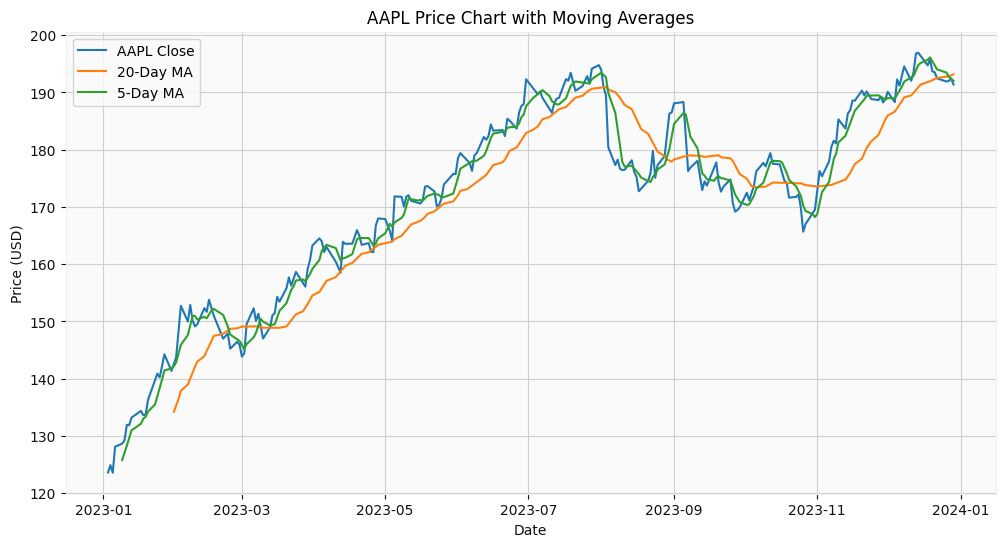

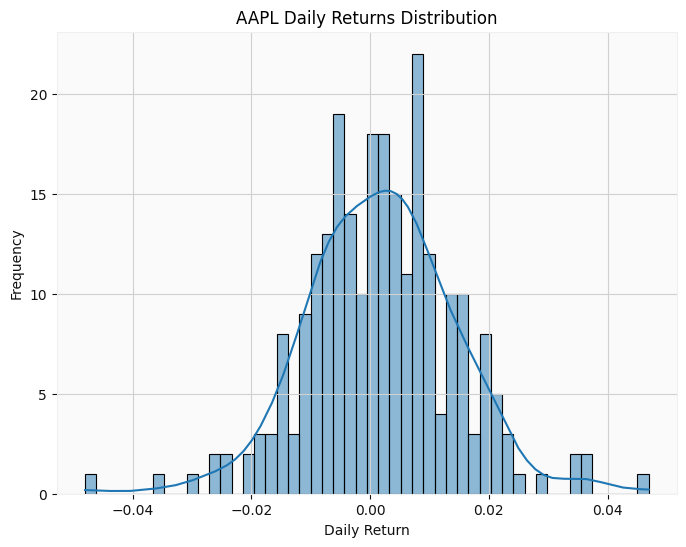

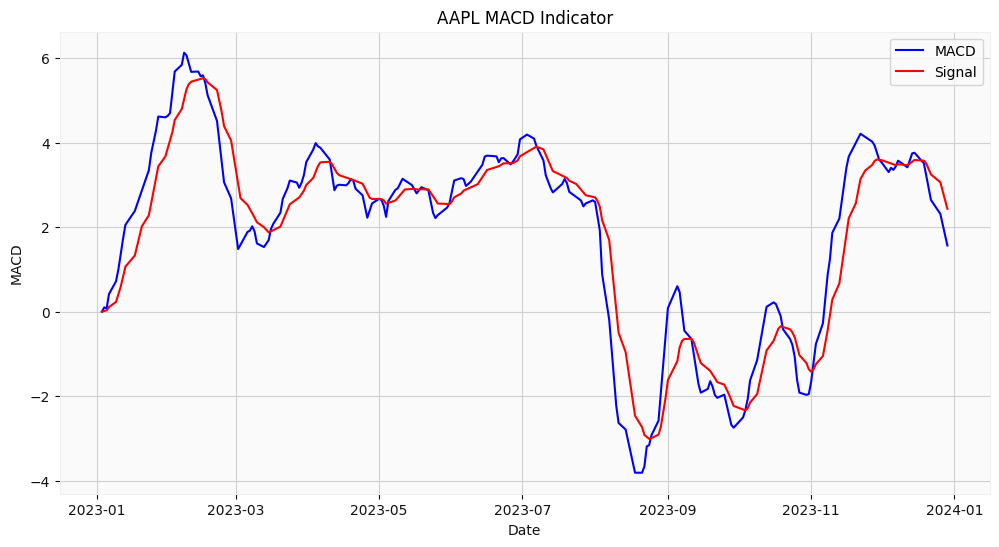

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set ticker and date range
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2024-01-01'

# Function to download data with fallback if empty
def get_stock_data(ticker, start, end, fallback_start=None, fallback_end=None):
    print(f"Downloading {ticker} data from {start} to {end}")
    data = yf.download(ticker, start=start, end=end)
    # Flatten multi-index columns if necessary
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    if data.empty and fallback_start and fallback_end:
        print("No data returned. Falling back to alternate date range.")
        print(f"Downloading {ticker} data from {fallback_start} to {fallback_end}")
        data = yf.download(ticker, start=fallback_start, end=fallback_end)
        if isinstance(data.columns, pd.MultiIndex):
            data.columns = data.columns.get_level_values(0)
    return data

# Try primary date range, and fallback if empty
aapl_data = get_stock_data(ticker, start_date, end_date, fallback_start='2020-01-01', fallback_end='2021-01-01')

if aapl_data.empty:
    print("No data available for fallback date range either. Exiting.")
    exit()

# Use 'Adj Close' if available; otherwise, use 'Close'
if 'Adj Close' in aapl_data.columns:
    aapl_series = aapl_data['Adj Close']
else:
    print("Adj Close not available; using Close instead.")
    aapl_series = aapl_data['Close']

# Create a DataFrame from the series
aapl_df = pd.DataFrame(aapl_series, columns=['Close'])

if aapl_df.empty:
    print("AAPL DataFrame is empty. Exiting.")
    exit()

# Calculate moving averages if enough data exists
if len(aapl_df) >= 20:
    aapl_df['MA20'] = aapl_df['Close'].rolling(window=20).mean()
else:
    aapl_df['MA20'] = np.nan
    print("Not enough data for 20-day moving average.")

if len(aapl_df) >= 5:
    aapl_df['MA5'] = aapl_df['Close'].rolling(window=5).mean()
else:
    aapl_df['MA5'] = np.nan
    print("Not enough data for 5-day moving average.")

# --- Plot 1: Price Chart with Moving Averages ---
plt.figure(figsize=(12, 6))
plt.plot(aapl_df.index, aapl_df['Close'], label='AAPL Close')
if not aapl_df['MA20'].isna().all():
    plt.plot(aapl_df.index, aapl_df['MA20'], label='20-Day MA')
if not aapl_df['MA5'].isna().all():
    plt.plot(aapl_df.index, aapl_df['MA5'], label='5-Day MA')
plt.title("AAPL Price Chart with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# --- Plot 2: Returns Distribution ---
aapl_returns = aapl_df['Close'].pct_change().dropna()
plt.figure(figsize=(8, 6))
sns.histplot(aapl_returns, bins=50, kde=True)
plt.title("AAPL Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# --- Plot 3: MACD Indicator ---
aapl_df['EMA12'] = aapl_df['Close'].ewm(span=12, adjust=False).mean()
aapl_df['EMA26'] = aapl_df['Close'].ewm(span=26, adjust=False).mean()
aapl_df['MACD'] = aapl_df['EMA12'] - aapl_df['EMA26']
aapl_df['Signal'] = aapl_df['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(aapl_df.index, aapl_df['MACD'], label='MACD', color='blue')
plt.plot(aapl_df.index, aapl_df['Signal'], label='Signal', color='red')
plt.title("AAPL MACD Indicator")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.show()


#### Portfolio visualizationl tool:
- Asset allocation pie chart
- Performance comparison
- Risk-return scatter plot
- Correlation heatmap

[*********************100%***********************]  4 of 4 completed


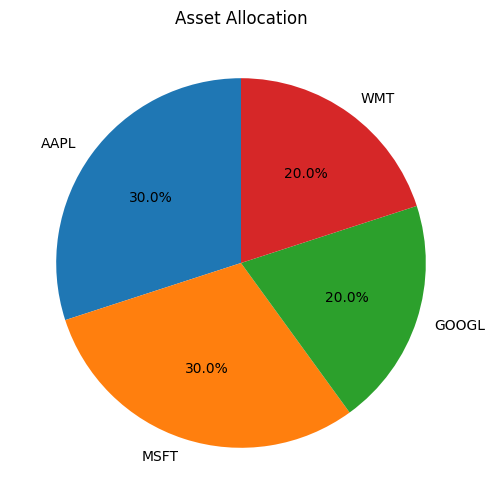

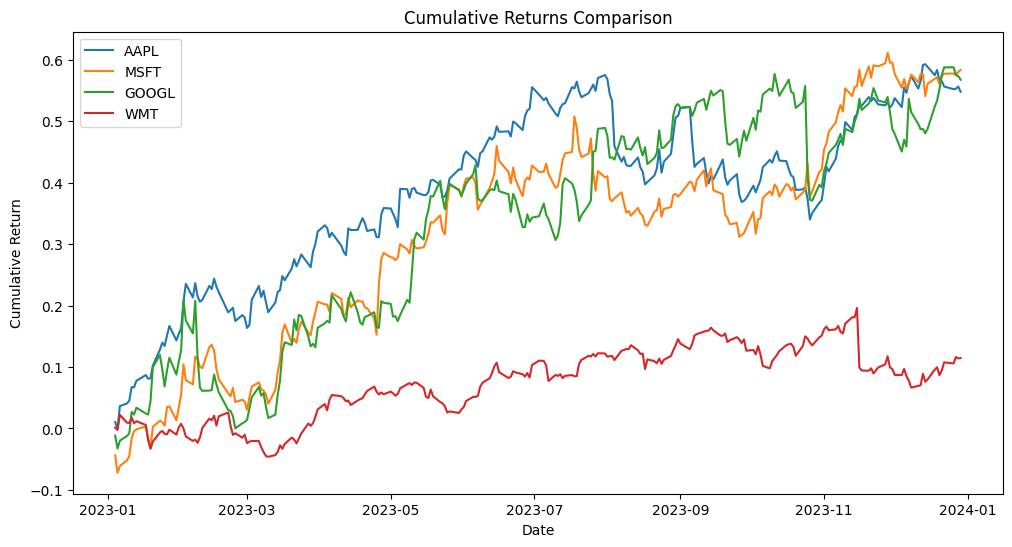

C:\Users\jonat\AppData\Local\Temp\ipykernel_94620\2261933233.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (annual_volatility[i], annual_return[i]))


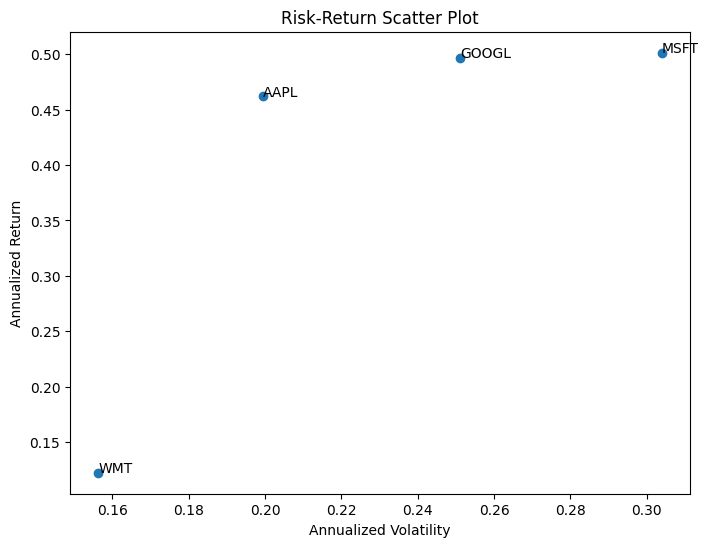

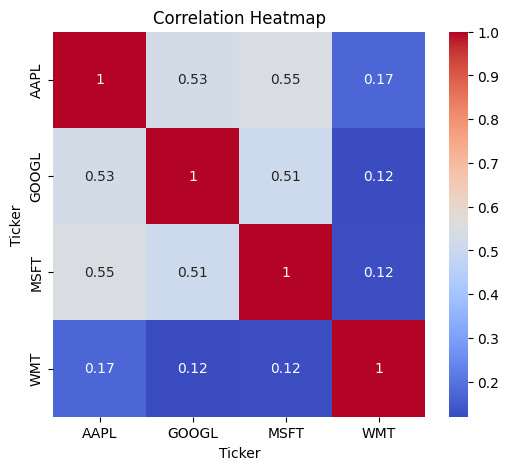

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Portfolio parameters
tickers = ['AAPL', 'MSFT', 'GOOGL', 'WMT']
weights = np.array([0.3, 0.3, 0.2, 0.2])
start_date = '2023-01-01'
end_date = '2024-01-01'

# Download adjusted close prices for portfolio stocks
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# --- Asset Allocation Pie Chart ---
plt.figure(figsize=(6,6))
plt.pie(weights, labels=tickers, autopct='%1.1f%%', startangle=90)
plt.title("Asset Allocation")
plt.show()

# --- Performance Comparison: Cumulative Returns ---
returns = data.pct_change().dropna()
cumulative_returns = (1 + returns).cumprod() - 1

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)
plt.title("Cumulative Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

# --- Risk-Return Scatter Plot ---
annual_return = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)
plt.figure(figsize=(8,6))
plt.scatter(annual_volatility, annual_return)
for i, txt in enumerate(tickers):
    plt.annotate(txt, (annual_volatility[i], annual_return[i]))
plt.title("Risk-Return Scatter Plot")
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.show()

# --- Correlation Heatmap ---
corr_matrix = returns.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#### Candlestick charts:
- OHLC candlestick patterns
- Volume overlay
- Support/resistance levels

[*********************100%***********************]  1 of 1 completed


Available columns: ['Close', 'High', 'Low', 'Open', 'Volume']


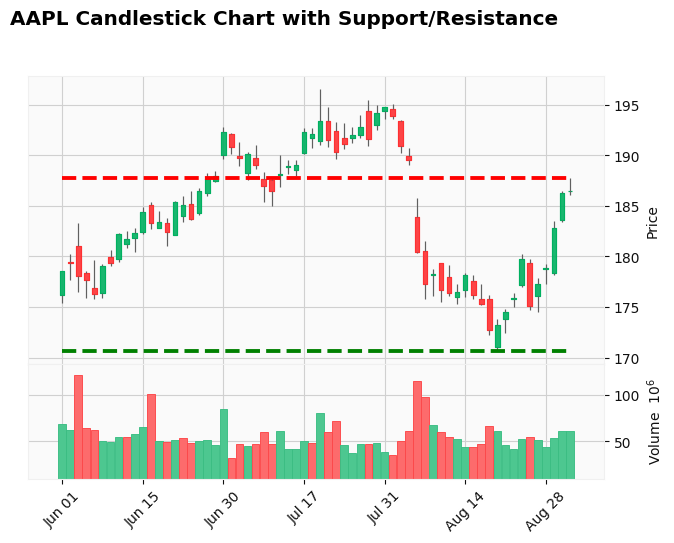

In [ ]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# Define stock and date range
ticker = 'AAPL'
start_date = '2023-06-01'
end_date = '2023-09-01'

# Download OHLCV data
data = yf.download(ticker, start=start_date, end=end_date)

# Flatten multi-index columns if necessary
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

# Debugging: Print available columns
print("Available columns:", data.columns.tolist())

# Ensure required columns exist
required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
missing_cols = [col for col in required_cols if col not in data.columns]

if missing_cols:
    print(f"⚠ Missing columns: {missing_cols}. Available columns: {data.columns.tolist()}")
    exit()

# Convert OHLCV columns to numeric (handle potential string/NaN values)
data[required_cols] = data[required_cols].apply(pd.to_numeric, errors='coerce')
data.dropna(subset=required_cols, inplace=True)  # Drop any remaining NaNs

# Ensure we have enough data to calculate support/resistance
if len(data) < 20:
    print(f"⚠ Not enough data ({len(data)} rows) to compute support/resistance levels.")
    exit()

# Calculate support and resistance using a 20-day rolling window
support = data['Low'].rolling(window=20).min().iloc[-1]
resistance = data['High'].rolling(window=20).max().iloc[-1]

# Create addplots for support and resistance levels
ap_support = mpf.make_addplot([support] * len(data), panel=0, color='green', linestyle='--')
ap_resistance = mpf.make_addplot([resistance] * len(data), panel=0, color='red', linestyle='--')

# Plot the candlestick chart with volume and overlays
mpf.plot(data, type='candle', style='yahoo', volume=True,
         addplot=[ap_support, ap_resistance],
         title=f"{ticker} Candlestick Chart with Support/Resistance")




#### Market analysis visualizations:
- Sector performance comparison
- Market breath indicators
- Index correlations

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed
[                       0%                       ]

Market Sentiment Analyzer:
       Average Daily Return  Daily Volatility  Positive Days (%)
^GSPC              0.000922          0.008258               56.4
^IXIC              0.001540          0.010958               60.0


[*********************100%***********************]  3 of 3 completed


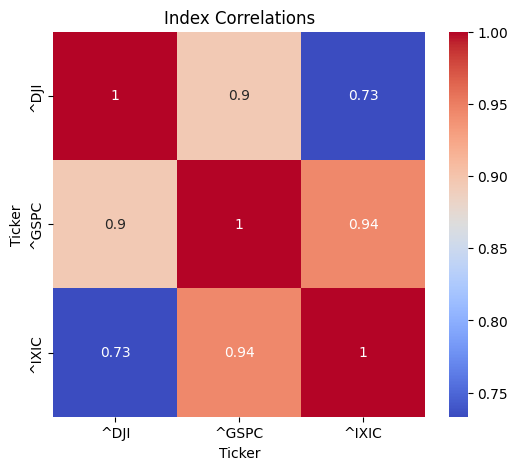

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define indices and date range
indices = ['^GSPC', '^IXIC']  # S&P 500 and NASDAQ
start_date = '2023-01-01'
end_date = '2024-01-01'

# Download index data (using 'Close' prices)
index_data = yf.download(indices, start=start_date, end=end_date)['Close']
index_returns = index_data.pct_change().dropna()

# Market breadth: average % of days index is above its 50-day moving average
ma50 = index_data.rolling(window=50).mean()
breadth = (index_data > ma50).mean() * 100

# Create market health report
market_health = pd.DataFrame({
    'Average Daily Return': index_returns.mean().values,
    'Daily Volatility': index_returns.std().values,
    'Positive Days (%)': breadth.values
}, index=indices)

print("Market Sentiment Analyzer:")
print(market_health)

# Plot index correlations as a heatmap
indices_full = ['^GSPC', '^IXIC', '^DJI']
index_data_full = yf.download(indices_full, start=start_date, end=end_date)['Close']
index_returns_full = index_data_full.pct_change().dropna()
corr_matrix = index_returns_full.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Index Correlations")
plt.show()



#### Risk analysis charts:
- Value at Risk (VaR) visualization
- Risk metrics dashboard
- Volatility analysis

[*********************100%***********************]  1 of 1 completed


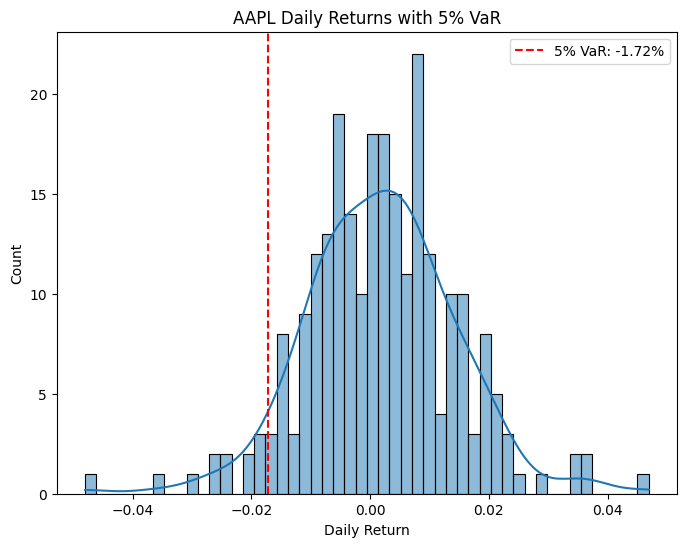

Risk Metrics Dashboard:
      Annualized Volatility  Skewness  Kurtosis
AAPL               0.199543  0.011755  1.432904


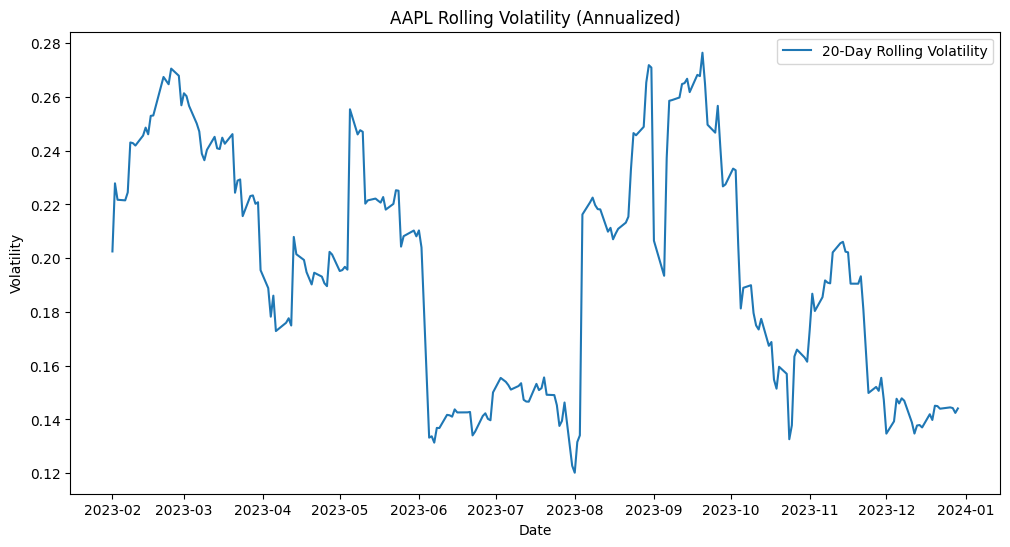

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start=start_date, end=end_date)['Close']
returns = data.pct_change().dropna()

# --- Value at Risk (VaR) Visualization ---
VaR_5 = np.percentile(returns, 5)  # 5% VaR
plt.figure(figsize=(8,6))
sns.histplot(returns, bins=50, kde=True)
plt.axvline(VaR_5, color='r', linestyle='--', label=f"5% VaR: {VaR_5:.2%}")
plt.title(f"{ticker} Daily Returns with 5% VaR")
plt.xlabel("Daily Return")
plt.legend()
plt.show()

# --- Risk Metrics Dashboard ---
risk_metrics = {
    'Annualized Volatility': returns.std() * np.sqrt(252),
    'Skewness': returns.skew(),
    'Kurtosis': returns.kurtosis()
}
risk_dashboard = pd.DataFrame(risk_metrics, index=[ticker])
print("Risk Metrics Dashboard:")
print(risk_dashboard)

# --- Volatility Analysis: Plot Rolling Volatility ---
rolling_vol = returns.rolling(window=20).std() * np.sqrt(252)
plt.figure(figsize=(12,6))
plt.plot(rolling_vol.index, rolling_vol, label='20-Day Rolling Volatility')
plt.title(f"{ticker} Rolling Volatility (Annualized)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


#### Options analysis dashboard:
- Option chain visualization
- Implied Volatility surface 
- Greeks analysis charts

[*********************100%***********************]  5 of 5 completed


Sector Rotation Analysis:
     Cumulative Return (%)
XLE              57.511986
XLV              40.476749
XLF              11.639226
XLK               2.984252
XLY               2.360445


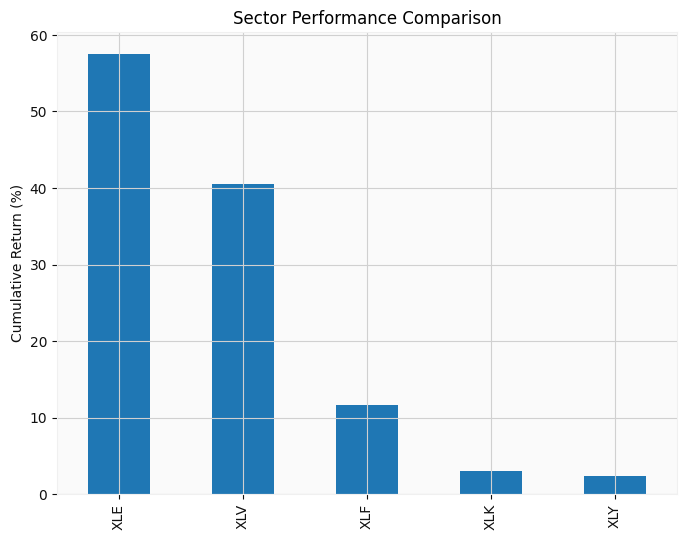

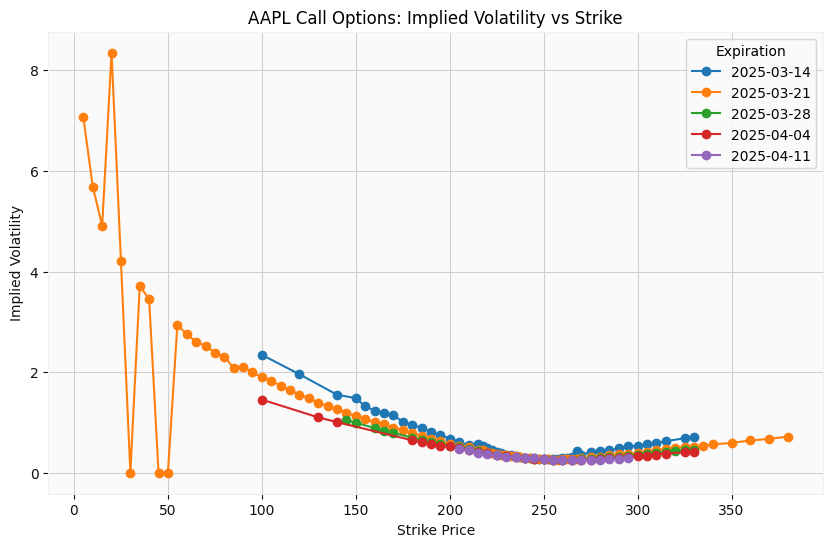

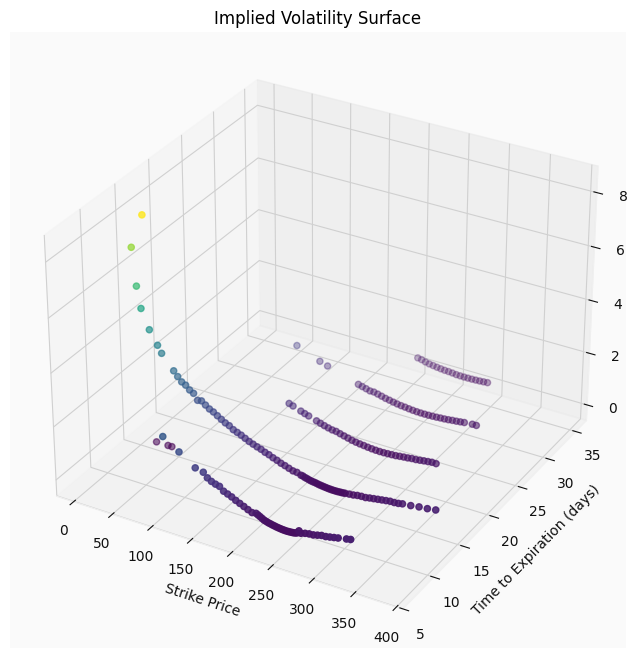

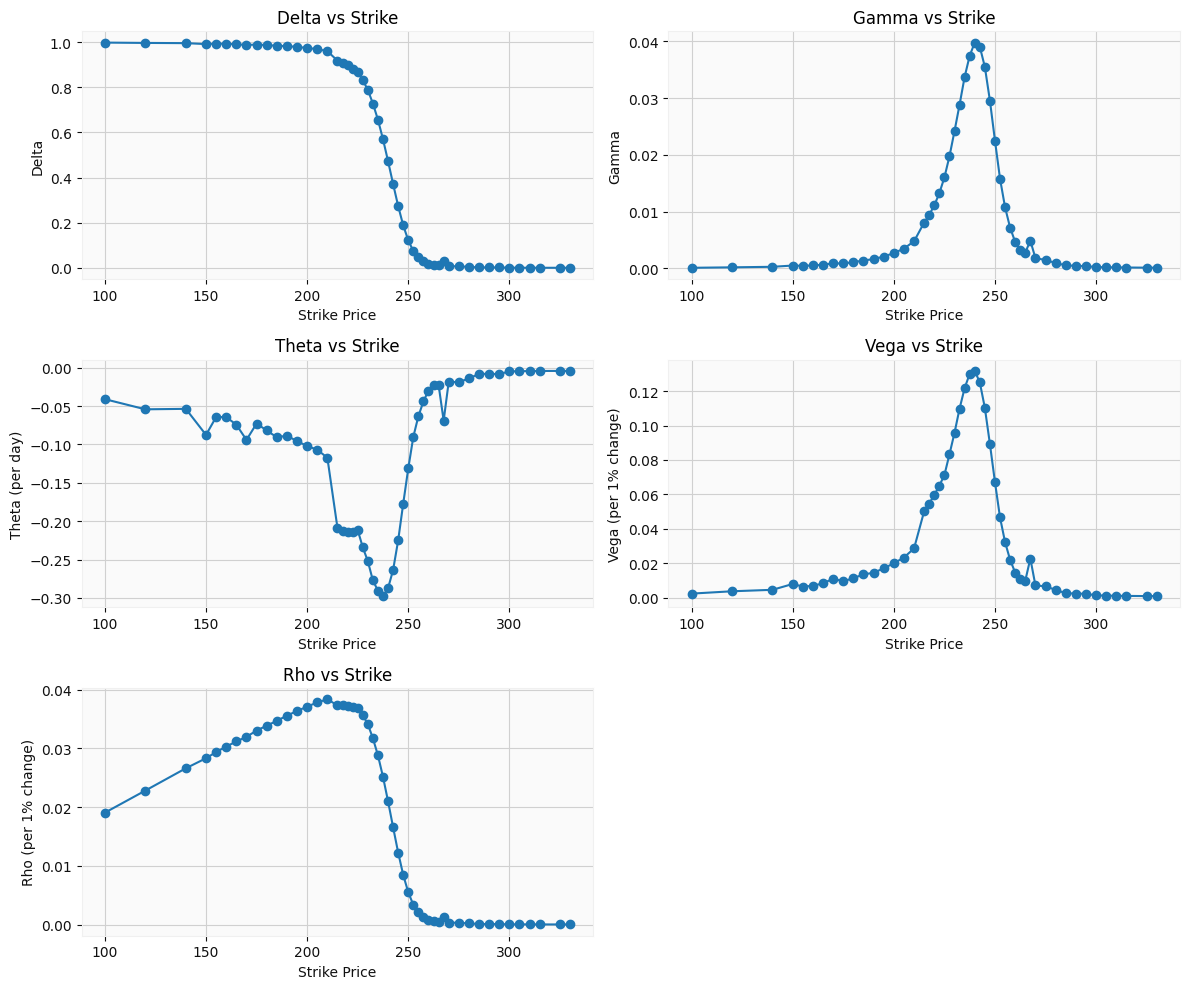

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import norm

# ------------- Part 1: Sector ETF Analysis ------------- #
# Define sector ETFs and date range
sector_etfs = ['XLK', 'XLF', 'XLE', 'XLY', 'XLV']  # Representing various sectors
start_date = '2023-01-01'
end_date = '2024-01-01'

# Download sector ETF data (using 'Close' as proxy for performance)
sector_data = yf.download(sector_etfs, start=start_date, end=end_date)['Close']

# Calculate cumulative return for each sector ETF over the period
cumulative_returns = (sector_data.iloc[-1] / sector_data.iloc[0] - 1) * 100

# Create a sorted DataFrame of sector performance
sector_analysis = pd.DataFrame({
    'Cumulative Return (%)': cumulative_returns.values
}, index=sector_etfs).sort_values(by='Cumulative Return (%)', ascending=False)

print("Sector Rotation Analysis:")
print(sector_analysis)

# Plot a bar chart of sector performance
plt.figure(figsize=(8,6))
sector_analysis['Cumulative Return (%)'].plot(kind='bar')
plt.title("Sector Performance Comparison")
plt.ylabel("Cumulative Return (%)")
plt.show()

# ------------- Part 2: Options Analysis Dashboard ------------- #
# For this example, we'll analyze options for AAPL.
ticker_option = 'AAPL'
option_ticker = yf.Ticker(ticker_option)

# Get underlying price (use recent close from history)
underlying_price = option_ticker.history(period='1d')['Close'].iloc[-1]
r = 0.01  # Assume a risk-free rate of 1%

# Function to compute Black-Scholes greeks for a call option
def compute_greeks(S, K, T, r, sigma):
    if T <= 0 or sigma <= 0:
        return (np.nan, np.nan, np.nan, np.nan, np.nan)
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    # Theta is computed per day (divide by 365)
    theta = (-S * norm.pdf(d1) * sigma / (2*np.sqrt(T)) - r * K * np.exp(-r*T) * norm.cdf(d2)) / 365
    # Vega per 1% change in volatility (divide by 100)
    vega = S * np.sqrt(T) * norm.pdf(d1) / 100
    # Rho per 1% change in rates (divide by 100)
    rho = K * T * np.exp(-r*T) * norm.cdf(d2) / 100
    return delta, gamma, theta, vega, rho

# Retrieve option chain data for several expiration dates (first 5 expirations)
expirations = option_ticker.options[:5]
option_data_list = []
for exp in expirations:
    opt_chain = option_ticker.option_chain(exp)
    calls = opt_chain.calls.copy()
    # Add expiration date as a datetime column
    calls['expiration'] = pd.to_datetime(exp)
    # Calculate time to expiration in years (based on today's date)
    today = pd.Timestamp.today().normalize()
    calls['T'] = (calls['expiration'] - today).dt.days / 365.0
    # Compute greeks for each call option using its implied volatility
    greeks = calls.apply(lambda row: compute_greeks(underlying_price, row['strike'], row['T'], r, row['impliedVolatility']), axis=1)
    calls[['Delta', 'Gamma', 'Theta', 'Vega', 'Rho']] = pd.DataFrame(greeks.tolist(), index=calls.index)
    option_data_list.append(calls)

# Combine all calls data into one DataFrame
all_calls = pd.concat(option_data_list)

# ---- Option Chain Visualization ----
# Plot implied volatility vs strike for each expiration date
plt.figure(figsize=(10, 6))
for exp in expirations:
    subset = all_calls[all_calls['expiration'] == pd.to_datetime(exp)]
    plt.plot(subset['strike'], subset['impliedVolatility'], marker='o', linestyle='-', label=str(exp))
plt.title(f"{ticker_option} Call Options: Implied Volatility vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend(title="Expiration")
plt.show()

# ---- Implied Volatility Surface ----
# 3D plot: strike (X-axis), time to expiration in days (Y-axis), and implied volatility (Z-axis)
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Multiply time to expiration in years by 365 to get days
ax.scatter(all_calls['strike'], all_calls['T'] * 365, all_calls['impliedVolatility'],
           c=all_calls['impliedVolatility'], cmap='viridis')
ax.set_title("Implied Volatility Surface")
ax.set_xlabel("Strike Price")
ax.set_ylabel("Time to Expiration (days)")
ax.set_zlabel("Implied Volatility")
plt.show()

# ---- Greeks Analysis Charts ----
# For the nearest expiration date, plot greeks vs strike
nearest_exp = pd.to_datetime(expirations[0])
nearest_calls = all_calls[all_calls['expiration'] == nearest_exp]

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(nearest_calls['strike'], nearest_calls['Delta'], marker='o', linestyle='-')
plt.title("Delta vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Delta")

plt.subplot(3, 2, 2)
plt.plot(nearest_calls['strike'], nearest_calls['Gamma'], marker='o', linestyle='-')
plt.title("Gamma vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Gamma")

plt.subplot(3, 2, 3)
plt.plot(nearest_calls['strike'], nearest_calls['Theta'], marker='o', linestyle='-')
plt.title("Theta vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Theta (per day)")

plt.subplot(3, 2, 4)
plt.plot(nearest_calls['strike'], nearest_calls['Vega'], marker='o', linestyle='-')
plt.title("Vega vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Vega (per 1% change)")

plt.subplot(3, 2, 5)
plt.plot(nearest_calls['strike'], nearest_calls['Rho'], marker='o', linestyle='-')
plt.title("Rho vs Strike")
plt.xlabel("Strike Price")
plt.ylabel("Rho (per 1% change)")

plt.tight_layout()
plt.show()


